In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [8]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
C = 1

In [11]:
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.5, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=5, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
y_pred = rbf_svc.predict(X)
print("RBF", accuracy_score(y,y_pred))

y_pred = lin_svc.predict(X)
print("linear", accuracy_score(y,y_pred))

y_pred=poly_svc.predict(X)
print("Polynomial",accuracy_score(y,y_pred))

RBF 0.8266666666666667
linear 0.8066666666666666
Polynomial 0.7933333333333333


In [13]:
y_pred = rbf_svc.predict(X)
print("RBF", accuracy_score(y,y_pred))

print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))
print(accuracy_score(y,y_pred))

RBF 0.8266666666666667
[[50  0  0]
 [ 0 38 12]
 [ 0 14 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.73      0.76      0.75        50
           2       0.75      0.72      0.73        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

0.8266666666666667


In [14]:
y_pred = lin_svc.predict(X)
print(confusion_matrix(y, y_pred))
print("Linear")
print(classification_report(y, y_pred))

[[49  1  0]
 [ 2 31 17]
 [ 0  9 41]]
Linear
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.76      0.62      0.68        50
           2       0.71      0.82      0.76        50

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.80       150
weighted avg       0.81      0.81      0.80       150



In [15]:
y_pred = poly_svc.predict(X)
print(confusion_matrix(y, y_pred))
print("Polynomial")
print(classification_report(y, y_pred))

[[50  0  0]
 [ 0 38 12]
 [ 0 19 31]]
Polynomial
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.67      0.76      0.71        50
           2       0.72      0.62      0.67        50

    accuracy                           0.79       150
   macro avg       0.80      0.79      0.79       150
weighted avg       0.80      0.79      0.79       150



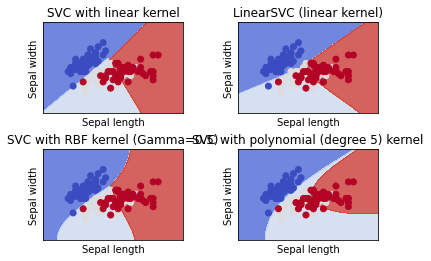

In [16]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel (Gamma=0.5)',
          'SVC with polynomial (degree 5) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()